In [ ]:
import idx2numpy
import cv2
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import os
import torch
from torchvision import transforms 
import torchvision
np.set_printoptions(threshold=np.inf)
# vehicle verify --specification Superclass/superclass.vcl --network classifier:Superclass/models/model.onnx --parameter epsilon:0.005 --dataset images:dataset/images.idx --dataset labels:dataset/labels.idx --verifier Marabou

In [2]:
from random import shuffle
import torch.utils


PATH = "../dataset/GTSRB/Training"
_N = 32


batch_size = 2048
transform = transforms.Compose([
    transforms.Resize((_N,_N)),
    transforms.ToTensor(),
    transforms.Grayscale()
])
dataset = torchvision.datasets.ImageFolder(root=PATH, transform=transform)
loader = torch.utils.data.DataLoader(dataset,
                                     batch_size=batch_size,
                                     num_workers=6,
                                     shuffle=False)


In [3]:
GROUP_NAMES = ["Unique Signs","Danger Signs","Derestriction Signs","Speed Limit Signs","Other Prohibitory Signs","Mandatory Signs"]
GROUPS = [3,3,3,3,3,3,2,3,3,4,4,1,0,0,0,4,4,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,5,5,5,5,5,5,5,5,2,2]

In [4]:
_images = []
_labels = []

for image,label in loader:
    size = len(label)
    _images.extend(torch.Tensor.numpy(image.reshape((size,_N,_N)),force=True))
    _labels.extend(torch.Tensor.numpy(label,force=True))

In [5]:
unique = set()
for ele in _labels:
    unique.add(ele)
unique

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42}

In [6]:
images = np.array(_images,dtype=np.float64)
labels = np.array(_labels,dtype=np.uint8)
groups = np.array([GROUPS[i] for i in labels])

In [7]:
print(labels.shape)
print(images.shape)

(39209,)
(39209, 32, 32)


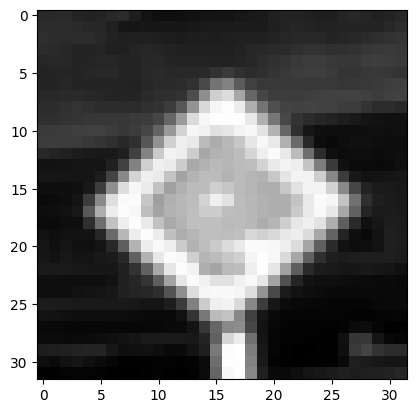

In [8]:
plt.imshow(images[20000],cmap="gray")

In [9]:
images.shape[:3]

(39209, 32, 32)

In [10]:
def write_idx(imgs,labels,n):
    imgs = imgs.reshape(imgs.shape[:3])
    frequency = np.zeros(shape=43)
    save_imgs = np.zeros((n*43,_N,_N),dtype=np.float64)
    save_labels = np.zeros(n*43,dtype=np.uint8)
    counter = 0
    for img,label in zip(imgs,labels):
        if frequency[label] >= n:
            continue
        frequency[label] += 1
        save_imgs[counter] = img
        save_labels[counter] = label
        counter += 1

    path = Path("../dataset") 
    save_labels = np.array([GROUPS[i] for i in save_labels],dtype=np.uint8)
    print(frequency)
    idx2numpy.convert_to_file(str(path / "images.idx"),save_imgs)
    idx2numpy.convert_to_file(str(path / "labels.idx"),save_labels)
write_idx(images,labels,1)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [1]:
def func():
    # Reading
    path = Path("../dataset")
    i = 40
    ndarr = idx2numpy.convert_from_file(str(path / "images.idx"))
    print(ndarr.shape)
    print(ndarr.dtype)
    plt.imshow(ndarr[i],cmap="gray") # 20 30 50 60
    ndarr = idx2numpy.convert_from_file(str(path / "labels.idx"))
    print(ndarr.shape)
    print(ndarr.dtype)
    print(ndarr)
    print(GROUP_NAMES[ndarr[i]])
func()

NameError: name 'Path' is not defined